<a href="https://colab.research.google.com/github/yesyell/DA_School_1/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/SVM_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM(Support vector machine)

서포트벡터머신은 회귀모델(SVR)과 분류모델(SVC)를 사용할 수 있으며, 파라미터로 커널과 Cost 가 존재합니다.

데이터가 2차원 상에 있을 때는 선형분류가 가능하지만, 선형분류가 불가능한 상황에서는 커널기법을 사용해야합니다.

In [ ]:
pip install mglearn

In [17]:
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
import mglearn

Text(0, 0.5, 'feature 1')

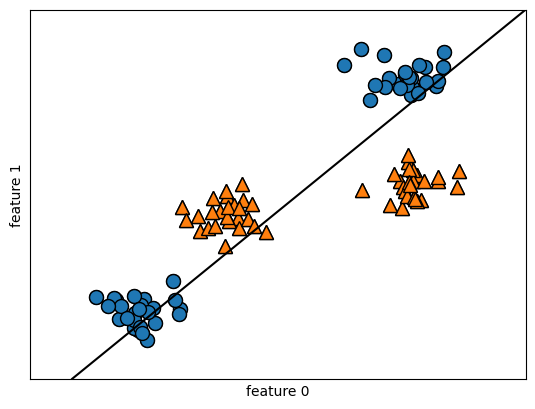

In [18]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

linear_svm = LinearSVC(max_iter=10000).fit(X, y)
mglearn.plots.plot_2d_separator(linear_svm, X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

Text(0, 0.5, 'feature 1')

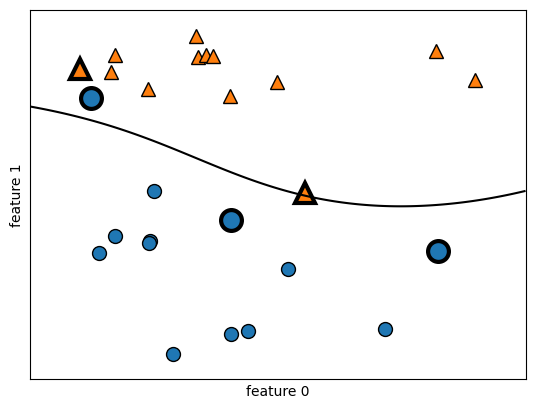

In [3]:
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)

# 데이터 포인트 그리기
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# 서포트 벡터
sv = svm.support_vectors_

# dual_coef_ 의 부호에 의해 서포트 벡터의 클래스 레이블이 결정됩니다
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)

plt.xlabel("feature 0")
plt.ylabel("feature 1")

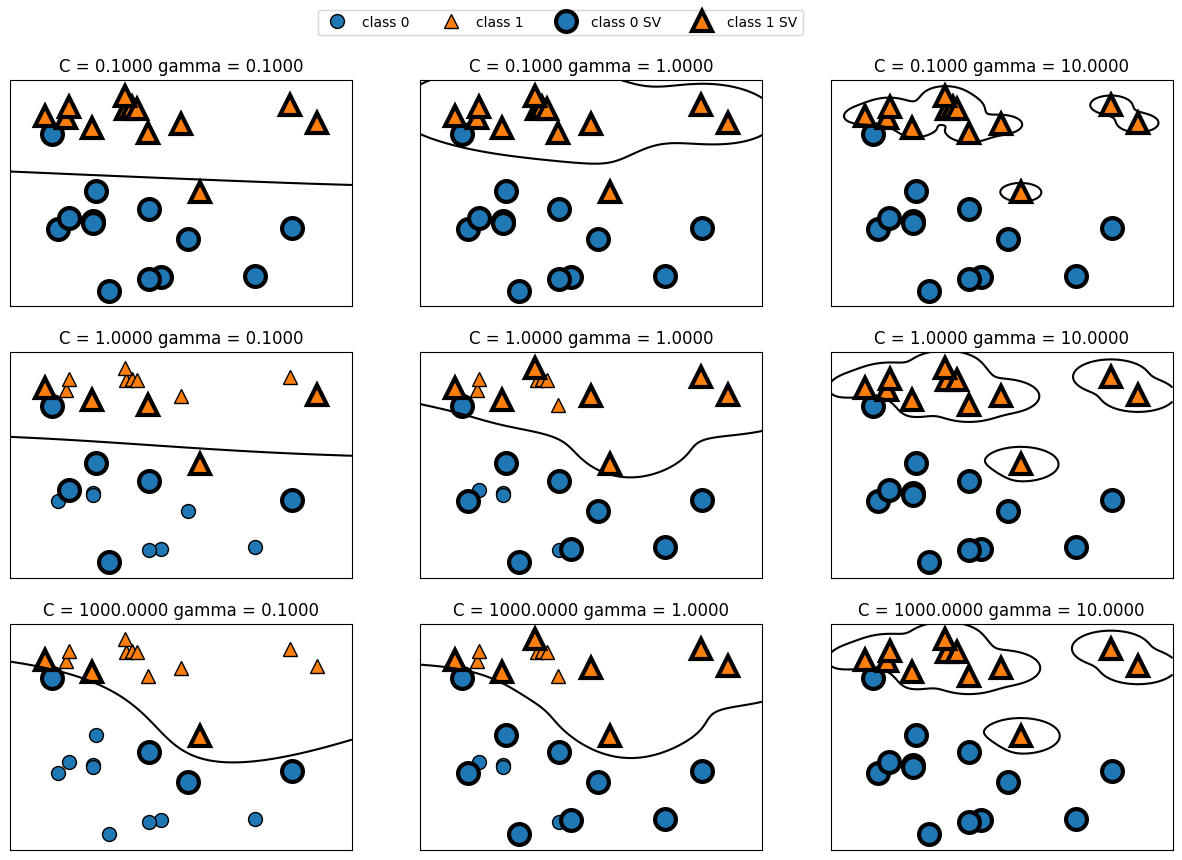

In [4]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0, 0].legend(["class 0", "class 1", "class 0 SV", "class 1 SV"],
                  ncol=4, loc=(.9, 1.2))

# 붓꽃 데이터

In [5]:
import numpy as np
import pandas as pd
from sklearn import datasets, svm
from sklearn.metrics import confusion_matrix

In [7]:
# 데이터 불러오기
iris = datasets.load_iris()

print(iris.keys())
print(iris.data.shape)
print(iris.feature_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


|   |   |
| --- | --- |
| Sepal Length | 꽃받침의 길이 정보이다. |
| Sepal Width | 꽃받침의 너비 정보이다. |
| Petal Length | 꽃잎의 길이 정보이다. |
| Petal Width | 꽃잎의 너비 정보이다. |
| Species | 꽃의 종류 정보이다.  setosa / versicolor / virginica 의 3종류로 구분된다. |

In [9]:
X = iris.data[:, [2, 3]]
y = iris.target

print('클래스 레이블:', np.unique(y))

클래스 레이블: [0 1 2]


## Kernel = linear
- 아래는 parameter를 조정해보는 실습

In [11]:
# SVM의 regularization parameter : C
C = 1
clf = svm.SVC(kernel = "linear", C=C)
clf.fit(X,y)

# confusion matrix를 통한 정확도 확인
y_pred = clf.predict(X) # 학습데이터 분류예측
confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  2, 48]])

## LinearSVM 활용

In [10]:
# sklearn의 SVM 모듈 안에는 LinearSVC이라는 함수가 따로 존재 -> 결과 차이 확인
clf = svm.LinearSVC(C=C, max_iter = 10000)
# 학습 반복횟수 10000

clf.fit(X,y)
y_pred = clf.predict(X)
confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 45,  5],
       [ 0,  4, 46]])

linear kernel 지정해주었을 때의 confusion matrix와 결과가 다릅니다.

사실 둘다 Linear모델이고 SVC모델인데 결과가 다른 이유가 없지않나? 생각이 들겠지만, 분명 차이가 있기에 결과가 다르게 나타나는 것입니다.

그 차이는 바로 사용하는 Loss fuction이 다르고 내부적으로 구현된 알고리즘에서 차이가 존재합니다.

## Kernel = rbf

In [13]:
# rbf 활용

clf = svm.SVC(kernel = 'rbf', gamma = 0.7, C=C, max_iter = 10000)
# gamma는 sigma^2에 해당하는 scale parameter
# 학습 반복횟수 10000

clf.fit(X,y)
y_pred = clf.predict(X)
confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  2, 48]])

## Kernel = poly

In [14]:
# polynomial 활용

clf = svm.SVC(kernel = 'poly', degree = 3, gamma = 'auto', C=C, max_iter = 10000)
# 3차항으로 설정, degree = 3
# 학습 반복횟수 10000

clf.fit(X,y)
y_pred = clf.predict(X)
confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  3, 47]])

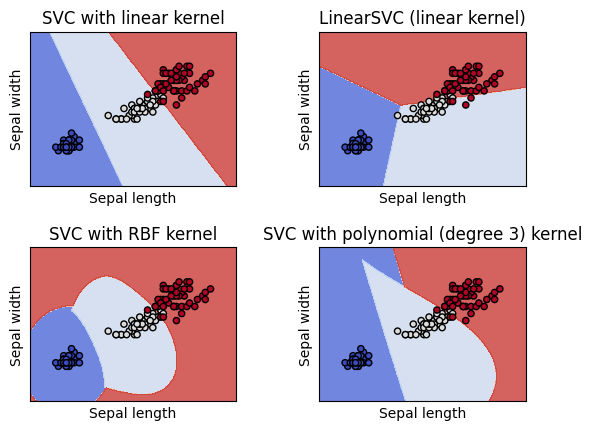

In [15]:
# 함수 정의
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# 모델 정의 & 피팅
C = 1.0 #regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(X, y) for clf in models)

# plot title 형성
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# plot 그리기
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

선형 모델인 kernel=’linear’ 과 LinearSVR 은 직선으로 잘 분리되지 못하였고,

비선형 모델인 RBF, Polynomial 은 곡선으로 분리해 주었습니다.